# Last saturation altitude  

<img src="Figs/lastsaturation.png" width="500" height="300">

** Aim: ** We want to show that the relative humidity of an air parcel in the troposphere can be predicted by the altitude at which it was last saturated. As a first approximation, we could consider the closest cloud above the tropospheric parcel, beign at altitude $z_{cloud}$. Supposing last saturation of tropospheric parcel occured at $z_{cloud}$, we can predict the relative humidity at parcel altitude as follows 
$$
RH_{predicted} = \frac{q_{sat}(z_{cloud})}{q_{sat}(z_{parcel})}
$$
This can be compared easily to the actual humidity at parcel altitude 
$$
RH_{actual} = \frac{q_{v}(z_{parcel})}{q_{sat}(z_{parcel})}
$$

** Note: **

$q_i$ is the mixing ratio of atmospheric component $i$. It measures the amount of componant $i$ in a given air mass, so it is given in g/kg (grams of $i$ per kilogram of air)

- $q_v$ = vapour  
- $q_r$ = rain  
- $q_c$ = cloud  
- $q_i$ = ice  
- $q_s$ = snow  
- $q_g$ = gropel (= grêle)  
- $q_{vm\phi}$ = dq/dt microphysics: distinguer condensation/évaporation  

We proceed in several steps to achieve our aim:

- Step 1: Determine the closest cloud altitude above a parcel located in the troposphere (~5km), for every grid point.  
- Step 2: Calculate the *actual* relative humidity at $z_{parcel}$ using $q_{v}(z_{parcel})$   
- Step 3: Compute the *predicted* relative humidity at $z_{parcel}$ using $q_{sat}(z_{cloud})$
- Step 4: Compare the distributions obtained in steps 2 & 3 to assess the assumption

## Importing data and libraries, read data

As shown below different datasets are indexed as follows:  

| Index          | Simulation     | 
| :------------- | :----------:   | 
|    no index    |  SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc                  |  
|        2       | $~~~~~~$SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull.nc   |  
|        3       | SAMUW_rceiso_cyclone_3D.nc                                 |
|        4       | SAMUW_rceiso_cyclone_m60hPad_3D.nc                         |
|        5       | SAMUW_rceiso_squall2_U10_H1000_2km_3D.nc                   |
|        6       | SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.nc               |

In [1]:
from numba import njit,jit
import seaborn as sns
sns.set(color_codes=True)
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import scipy.stats as sp

In [2]:
data = Dataset('NetCDF/SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc')
data2 = Dataset('NetCDF/SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull.nc')
data3 = Dataset('NetCDF/SAMUW_rceiso_cyclone_3D.nc')
data4 = Dataset('NetCDF/SAMUW_rceiso_cyclone_m60hPad_3D.nc')
#data5 = Dataset('NetCDF/SAMUW_rceiso_squall2_U10_H1000_2km_3D.nc')
data5 = Dataset('NetCDF/rceiso_squall2_U10_H1000_2km_rceiso01_3D.nc')
data6 = Dataset('NetCDF/SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.nc')
print("data:")
print(data)
qc = data.variables['QC'][:]
qi = data.variables['QI'][:]
qsat = data.variables['QSAT'][:]
qv = data.variables['QV'][:]
x = np.asarray(data.variables['x'][:])
y = np.asarray(data.variables['y'][:])
z = np.asarray(data.variables['z'][:])
t = data.variables['time'][:]
t = t - 50

qc2 = data2.variables['QC'][:]
qi2 = data2.variables['QI'][:]
qsat2 = data2.variables['QSAT'][:]
qv2 = data2.variables['QV'][:]
x2 = np.asarray(data2.variables['x'][:])
y2 = np.asarray(data2.variables['y'][:])
z2 = np.asarray(data2.variables['z'][:])
t2 = data2.variables['time'][:]
t2 = t2 - 50

qc3 = data3.variables['QC'][:]
qi3 = data3.variables['QI'][:]
qsat3 = data3.variables['QSAT'][:]
qv3 = data3.variables['QV'][:]
x3 = np.asarray(data3.variables['x'][:])
y3 = np.asarray(data3.variables['y'][:])
z3 = np.asarray(data3.variables['z'][:])
t3 = data3.variables['time'][:]
t3 = t3 - 45

qc4 = data4.variables['QC'][:]
qi4 = data4.variables['QI'][:]
qsat4 = data4.variables['QSAT'][:]
qv4 = data4.variables['QV'][:]
x4 = np.asarray(data4.variables['x'][:])
y4 = np.asarray(data4.variables['y'][:])
z4 = np.asarray(data4.variables['z'][:])
t4 = data4.variables['time'][:]
t4 = t4 - 40

qc5 = data5.variables['QC'][:]
qi5 = data5.variables['QI'][:]
qsat5 = data5.variables['QSAT'][:]
qv5 = data5.variables['QV'][:]
x5 = np.asarray(data5.variables['x'][:])
y5 = np.asarray(data5.variables['y'][:])
z5 = np.asarray(data5.variables['z'][:])
t5 = data5.variables['time'][:]
t5 = t5 - 41

qc6 = data6.variables['QC'][:]
qi6 = data6.variables['QI'][:]
qsat6 = data6.variables['QSAT'][:]
qv6 = data6.variables['QV'][:]
x6 = np.asarray(data6.variables['x'][:])
y6 = np.asarray(data6.variables['y'][:])
z6 = np.asarray(data6.variables['z'][:])
t6 = data6.variables['time'][:]
t6 = t6 - 41

print( "qc: ", data.variables['QC'],
       "qi: ", data.variables['QI'],
       "z: ", data.variables['z'],    )
print(t,t2,t3,t4,t5,t6)

data:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Sun Jun 14 13:55:07 2020: ncks -v x,y,z,p,W,TABS,QV,HDOV,O18V,QR,HDOR,O18R,QG,HDOG,O18G,QS,HDOS,O18S,QC,HDOC,O18C,QI,HDOI,O18I,QVMPHY,QRMPHY,QSAT,HDOVMPHY,O18VMPHY,HDORMPHY,O18RMPHY,HDOVak,O18Vak -d z,1,68 tmp.nc inputs/SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc
Sun Jun 14 13:54:59 2020: ncrcat /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000432000.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000440640.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000449280.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000457920.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000466560.nc /ccc/store/cont003/gen7632/risicami/SAMUW_rceiso_96km_30C_750m/rceiso_rceiso01_64_0000475200.nc /ccc/store/con

# Step 1: Finding the altitude of closest clouds above the troposhpere  
For now we focus on dataset 'SAMUW_rceiso_96km_30C_750m_3Dmphyfull' and figure out how to perform ** Step 1 ** for those data.
## Find index of altitude 5km
The first thing we want to know is where the troposphere is in the z array, i.e., at which array index izparcel altitude zparcel is   

In [3]:
i = 0
while z[i] <= max(z):
    if z[i] >= 5000:
        zparcel = z[i]
        izparcel = i
        break
    i+=1
print("index of zparcel: ", izparcel, ", zparcel = ", zparcel)

index of zparcel:  23 , zparcel =  5077.64


## 2D maps of cloud ice mixing ratio $q_i$ and cloud water mixing ratio $q_c$

Clouds are detected by computing the sum of ice mixing ratio $q_i$ and water mixing ratio $q_c$, which correspond to the amount of ice/water contained in a certain air mass. By setting a threshold $\texttt{thresh} = 1 \times 10^{-6}$ g/kg (Risi et. al. 2021) we sort the ($x,y,z$) locations as being part of clouds or environment in each dataset.

In [4]:
# QImap = plt.pcolormesh(qi[0,:,:,izparcel], cmap="Blues_r")
# cb = plt.colorbar(QImap)
# cb.set_label("$q_i$ (g/kg)")
# plt.show()
# QCmap = plt.pcolormesh(qc[0,:,:,izparcel], cmap="Blues_r")
# cb = plt.colorbar(QCmap)
# cb.set_label("$q_c$ (g/kg)")
# plt.show()

## First cloud above parcel detection (1D)

As previously stated, presence of clouds is detected by the quantity $q_c + q_i$ reaching a threshold of $1\times10^{-6}$ g/kg. Above a particular coordinate (x,y), the closest cloud altitude $z_{cloud}$ can be detected as following:

In [5]:
zcloud = 0
thresh = 1e-6
cond = qc[0,izparcel:,0,0]+qi[0,izparcel:,0,0]
if np.max(cond) - thresh >= 0:
    zcloud = z[np.min(np.where(cond-thresh>=0))] + zparcel
else:
    zcloud = np.max(z)
print("zcloud = ", zcloud)

zcloud =  8127.3604


## First cloud above parcel detection (2D)  
Using the same method, we now find all closest clouds along the $x$-axis

In [6]:
xclouds = np.zeros(len(x))
zclouds = np.zeros(len(x))
thresh = 1e-6
k = izparcel
for i in np.arange(len(x)):
    xclouds[i] = i
    cond = qc[0,izparcel:,0,i]+qi[0,izparcel:,0,i]
    if np.max(cond) - thresh >= 0:
        zclouds[i] = z[np.min(np.where(cond-thresh>=0))] + zparcel
    else:
        zclouds[i] = np.max(z)



### 2D plot result

Cloud base altitude is given along the $x$-axis . Parcel altitude is shown by the red line 

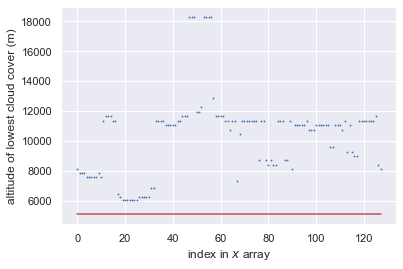

In [7]:
plt.plot(xclouds, np.ones((len(zclouds)))*zparcel, color="r")
plt.scatter(xclouds, zclouds, s=0.7)
plt.xlabel('index in $x$ array')
plt.ylabel('altitude of lowest cloud cover (m)')
plt.show()

## Detection of first cloud above parcel  (3D)  


In [8]:
zclouds = np.zeros((len(t),len(x),len(y)))
thresh = 1e-6
for time in np.arange(len(t)):
    for i in np.arange(len(x)):
        for j in np.arange(len(y)):
            cond = qc[time,izparcel:,j,i]+qi[time,izparcel:,j,i]
            if np.max(cond) - thresh >= 0:
                zclouds[time,i,j] = z[np.min(np.where(cond-thresh>=0))]
            else:
                zclouds[time,i,j] = np.max(z) - zparcel

### Plot of the result

$z_{clouds}$ is the altitude in meters above the tropospheric parcel ($z_{parcel} \approx$ 5000 m) at which the first cloud is encountered. Following the 2D approach, values of $z = z_{max} \approx$ 18 000 m are given to grid points with no cloud cover.  
Therefore white regions show cloud cover close to the troposphere while blue regions show higher or no cloud cover. 

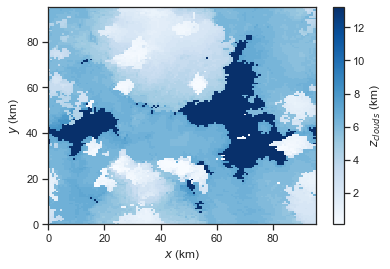

In [9]:
with sns.axes_style("ticks"):
    Cloudmap = plt.pcolormesh(x/1000, y/1000, zclouds[0,:,:]/1000, cmap="Blues")
    plt.xlabel("$x$ (km)")
    plt.ylabel("$y$ (km)")
    cb = plt.colorbar(Cloudmap)
    cb.set_label('$z_{clouds}$ (km)')
    plt.savefig("Figs/3Dclouds.eps", format="EPS", dpi=600)
    plt.show()

# Pdf of $z_{cloud}$ above 5km

We are now interested in finding the distribution of relative humidity throughout the 3D domain. We therefore neglect the spatial and temporal distribution of $RH$ and $z_{clouds}$. First we look at the the $z_{clouds}$ distribution. We choose somewhat arbitrarily the number of bins to be 30 throughout every histogram calculation.

In [ ]:
nbins = 30

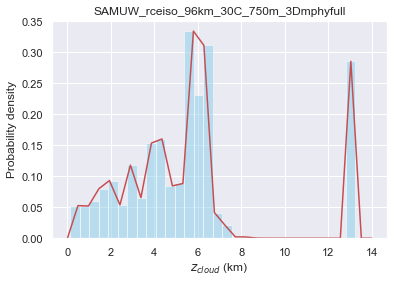

In [10]:
zzclouds = zclouds.flatten()
hist = np.histogram(zzclouds/1000, density=True, bins=30)
plt.hist(zzclouds/1000, rasterized=True, color='skyblue', density=True, bins=nbins, alpha=0.5)
distrib = sp.rv_histogram(hist)
xaxis = np.linspace(0,14,30)
plt.plot(xaxis, distrib.pdf(xaxis), color='r')
plt.title('SAMUW_rceiso_96km_30C_750m_3Dmphyfull')
plt.xlabel('$z_{clouds}$ (km)')
plt.ylabel('Probability density')
plt.show()

# Step 2: Calculate the *actual* RH at 5km
*Reminder* The actual relative humidity in the troposphere is the ratio of vapour mixing ratio $q_v$ over the saturation mixing ratio $q_{sat]}$:
$$
RH = q_v/q_{sat}
$$
*Data info*

In [11]:
print('qsat: ', data.variables['QSAT'], 'qv: ', data.variables['QV'])

qsat:  <class 'netCDF4._netCDF4.Variable'>
float32 QSAT(time, z, y, x)
    long_name: Saturation specific humidity                                                    
    units: g/kg      
unlimited dimensions: time
current shape = (10, 68, 128, 128)
filling on, default _FillValue of 9.969209968386869e+36 used
 qv:  <class 'netCDF4._netCDF4.Variable'>
float32 QV(time, z, y, x)
    long_name: Water Vapor                                                                     
    units: g/kg      
unlimited dimensions: time
current shape = (10, 68, 128, 128)
filling on, default _FillValue of 9.969209968386869e+36 used



### RH loop  

We calculate the relative humidity at parcel altitude $\texttt{rh}$ by looping over time and grid axes. Theres is an added $\texttt{if}$ statement here because units of $q_v$ and $q_{sat}$ are not always well input. This essentially prevents $\texttt{rh} > 1$. Note that there are still some grid points with $\texttt{rh}$ slightly superior to 1 due to oversaturation in ice clouds.

In [12]:
rh = np.zeros((len(t),len(x),len(y)))
for time in np.arange(len(t)):
        for i in np.arange(len(x)):
            for j in np.arange(len(y)):
                if 100 < qv[time,izparcel,j,i]/qsat[time,izparcel,j,i]:
                    rh[time,i,j] = (qv[time,izparcel,j,i]/qsat[time,izparcel,j,i])/1000
                else:
                    rh[time,i,j] = (qv[time,izparcel,j,i]/qsat[time,izparcel,j,i])

maxindex = np.unravel_index(rh.argmax(), rh.shape)
print(maxindex)
print(rh[ maxindex[0], maxindex[1], maxindex[2] ])

(5, 53, 106)
1.0592001676559448


### Plot of RH pdf for the first simulation

The pdf (in red) is plotted over the data histogram

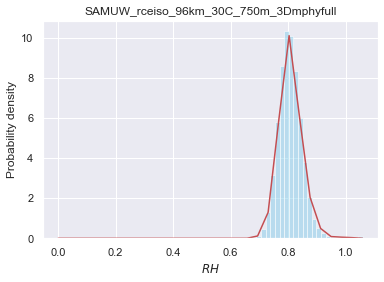

In [13]:
Rh = rh.flatten()
hist = np.histogram(Rh, density=True, bins=30)
plt.hist(Rh, color='skyblue', density=True, bins=30, alpha=0.5)
distrib = sp.rv_histogram(hist)
xaxis = np.linspace(0,np.max(Rh),30)
plt.plot(xaxis, distrib.pdf(xaxis), color='r')
plt.xlabel('$RH$')
plt.ylabel('Probability density')
plt.title('SAMUW_rceiso_96km_30C_750m_3Dmphyfull')
plt.show()

# Other datasets  

To perform the same analysis on other datasets, we define functions for each looping process (e.g. last saturation altitude detection LSA(T,X,Y,Z,QI,QC)) that allow to perform the same calculations done previously. To speedup the code, the functions are compiled using Numba ([See documentation](https://numba.pydata.org/))

### Functions   
- $\texttt{Zparcel(Z)}$: Determines altitude and array index of the tropospheric air parcel  
- $\texttt{LSA(T,X,Y,Z,QI,QC,QSAT)}$: Determines altitude of closest cloud above parcel $(z_{clouds})$ and appends the value of $q_{sat}$ there. Also returns the index of $z_{clouds}$.
- $\texttt{RELHUM(T,X,Y,Z,QV,QSAT)}$: Computes the actual relative humidity at the troposphere.
- $\texttt{RELHUMP(T,X,Y,Z,QSAT,iZclouds)}$: Computes the predicted relative humidity at the troposphere.

In [126]:
@njit
def Zparcel(Z):
    i = 0
    while Z[i] <= max(Z):
        if Z[i] >= 5000:
            Zparcel = Z[i]
            iZparcel = i
            break
        i+=1
    return iZparcel, Zparcel
@njit
def LSA(T,X,Y,Z,QI,QC,QSAT):
    zclouds = np.zeros( ( len(T),len(X),len(Y) ) )
    izclouds = np.zeros( ( len(T),len(X),len(Y) ) )
    qsatzclouds = np.zeros( ( len(T),len(X),len(Y) ) )
    thresh = 1e-6
    for time in np.arange(len(T)):
        for i in np.arange(len(X)):
            for j in np.arange(len(Y)):
                cond = QC[time,Zparcel(Z)[0]:,j,i]+QI[time,Zparcel(Z)[0]:,j,i]
                if np.max(cond) - thresh >= 0:
                    toto = np.where(cond-thresh>=0)
                    (matrix,) = toto
                    zclouds[time,i,j] = Z[np.min(matrix)]
                    izclouds[time,i,j] = int(np.min(matrix))
                    qsatzclouds[time,i,j] = QSAT[time,np.min(matrix),j,i]
                    if qsatzclouds[time,i,j] > 100:
                        qsatzclouds[time,i,j] = qsatzclouds[time,i,j]/1000
                else:
                    zclouds[time,i,j] = np.max(Z) - Zparcel(Z)[1]
                    izclouds[time,i,j] = int(np.argmax(Z))
                    qsatzclouds[time,i,j] = QSAT[time,np.argmax(Z),j,i]
                    if qsatzclouds[time,i,j] > 100:
                        qsatzclouds[time,i,j] = qsatzclouds[time,i,j]/1000
    return zclouds, izclouds, qsatzclouds

### Parcel altitude and  array index from each simulation  
Here we make use of Zparcel(Z) to plot altitude of parcel and its index in z array dependending on each dataset

In [15]:
# zlist = np.array([z,z2,z3,z4,z5,z6])
# izlist = np.array(['z','z2','z3','z4','z5','z6'])
# zparcelist = np.zeros(6)
# for i in np.arange(len(zlist)):
#     zparcelist[i] = Zparcel(zlist[i])[1]
# plt.scatter(izlist, zparcelist)
# plt.xlabel('Sample')
# plt.ylabel('$z_{parcel}$')
# plt.show()
# izparcelist = np.zeros(6)
# for i in np.arange(len(zlist)):
#     izparcelist[i] = Zparcel(zlist[i])[0]
# plt.scatter(izlist, izparcelist)
# plt.xlabel('Sample')
# plt.ylabel('index of $z_{parcel}$ in sample')
# plt.show()

### Last saturation altitude  
We calculate the altitude of closest cloud above parcel at each time step for all grid points and every dataset.

In [127]:
lsa = LSA(t,x,y,z,qi,qc,qsat)
lsa2 = LSA(t2,x2,y2,z2,qi2,qc2,qsat2)
lsa3 = LSA(t3,x3,y3,z3,qi3,qc3,qsat3)
lsa4 = LSA(t4,x4,y4,z4,qi4,qc4,qsat4)
lsa5 = LSA(t5,x5,y5,z5,qi5,qc5,qsat5)
lsa6 = LSA(t6,x6,y6,z6,qi6,qc6,qsat6)

Since $\texttt{LSA(T,X,Y,Z,QI,QC,QSAT)}$ has several outputs, we need to associate the right input to the altitude of the closest cloud above each grid point for each simulation, as is done in the next cell.

In [27]:
zclouds = lsa[0].flatten()
zclouds2 = lsa2[0].flatten()
zclouds3 = lsa3[0].flatten()
zclouds4 = lsa4[0].flatten()
zclouds5 = lsa5[0].flatten()
zclouds6 = lsa6[0].flatten()

We then make a list of all these outputs and one with the associated simulation names

In [28]:
zcloudslist = np.asarray([[zclouds, zclouds2, zclouds3], [zclouds4, zclouds5, zclouds6]])
plotlabelslist = np.asarray([['SAMUW_rceiso_96km_30C_750m_3Dmphyfull','SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull', 'SAMUW_rceiso_cyclone_3D'], ['SAMUW_rceiso_cyclone_m60hPad_3D', 'rceiso_squall2_U10_H1000_2km_rceiso01_3D', 'SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D']])

The next cell plots all results together in one figure.

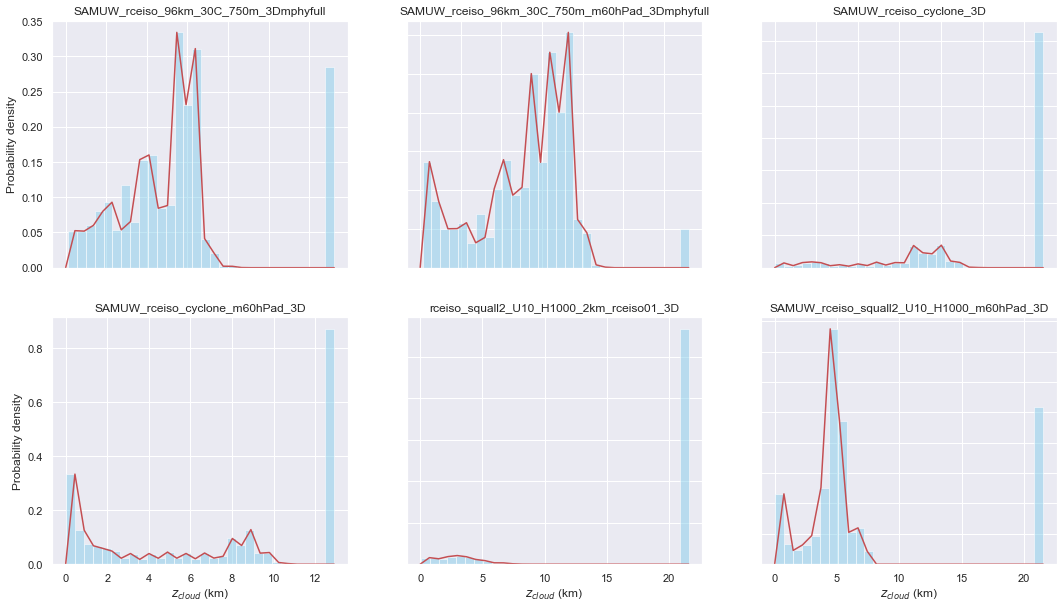

In [29]:
fig, ax = plt.subplots(2,3,figsize=(18,10))
for i in np.arange(len(zcloudslist[:,0])):
    for j in np.arange(len(zcloudslist[0,:])):
        zcloudshist = np.asarray(np.histogram(zcloudslist[i,j]/1000, density=True, bins=nbins))
        zcloudsdistrib = sp.rv_histogram(zcloudshist)
        zcloudsxaxis = np.linspace(0,np.max(zcloudslist[i,j]/1000),nbins)
        ax[i,j].plot(zcloudsxaxis, zcloudsdistrib.pdf(zcloudsxaxis), color='r')
        ax[i,j].hist(zcloudslist[i,j]/1000, rasterized=True, color='skyblue', density=True, bins=nbins, alpha = 0.5)
        ax[i,j].set_title(plotlabelslist[i,j])
        ax[i,j].set_xlabel('$z_{clouds}$ (km)')
        ax[i,j].set_ylabel('Probability density')
for axi in ax.flat:
    axi.label_outer()
plt.savefig('Figs/zclouds_pdf.png' , format='PNG', dpi=600)
plt.show()

### Actual relative humidity at 5km  

Here the same process is repeated for the actual relative humidity

In [40]:
@njit
def RELHUM(T,X,Y,Z,QV,QSAT):
    RH = np.zeros( (len(T),len(X),len(Y)) )
    for time in np.arange(len(T)):
        for i in np.arange(len(X)):
            for j in np.arange(len(Y)):
                if 100 < QV[time,Zparcel(Z)[0],j,i]/QSAT[time,Zparcel(Z)[0],j,i]:
                    RH[time,i,j] = (QV[time,Zparcel(Z)[0],j,i]/QSAT[time,Zparcel(Z)[0],j,i])/1000
                else:
                    RH[time,i,j] = (QV[time,Zparcel(Z)[0],j,i]/QSAT[time,Zparcel(Z)[0],j,i])
        
    return RH

In [41]:
RH = RELHUM(t,x,y,z,qv,qsat)
RH2 = RELHUM(t2,x2,y2,z2,qv2,qsat2)
RH3 = RELHUM(t3,x3,y3,z3,qv3,qsat3)
RH4 = RELHUM(t4,x4,y4,z4,qv4,qsat4)
RH5 = RELHUM(t5,x5,y5,z5,qv5,qsat5)
RH6 = RELHUM(t6,x6,y6,z6,qv6,qsat6)

In [42]:
Rh = RH.flatten()
Rh2 = RH2.flatten()
Rh3 = RH3.flatten()
Rh4 = RH4.flatten()
Rh5 = RH5.flatten()
Rh6 = RH6.flatten()

In [43]:
Rhlist = np.array([[Rh,Rh2, Rh3],[Rh4, Rh5, Rh6]])

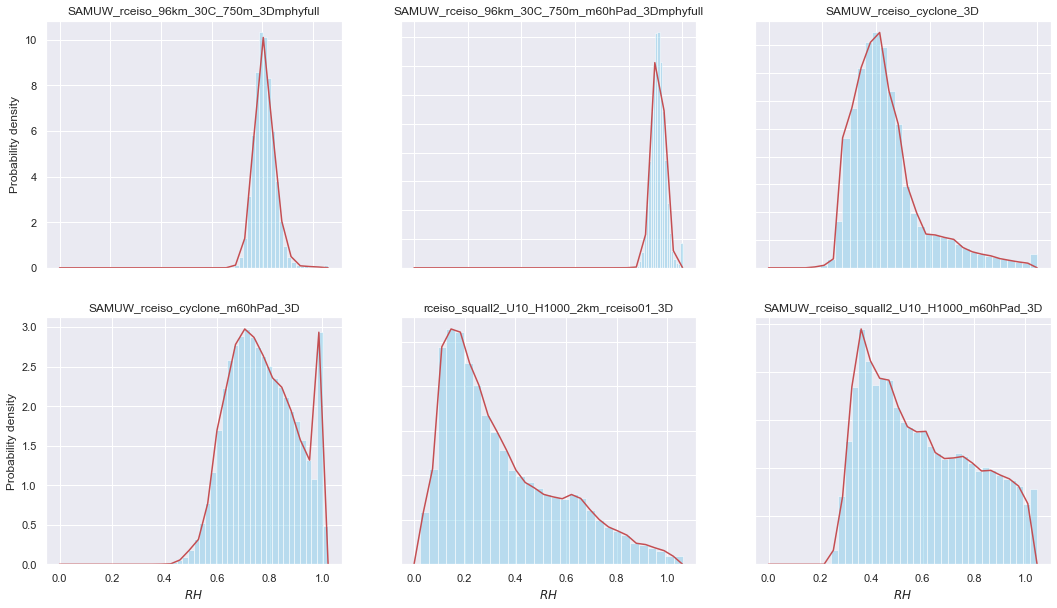

In [44]:
fig, ax = plt.subplots(2,3,figsize=(18,10))
for i in np.arange(len(Rhlist[:,0])):
    for j in np.arange(len(Rhlist[0,:])):
        Rhhist = np.asarray(np.histogram(Rhlist[i,j], density=True, bins=nbins))
        Rhdistrib = sp.rv_histogram(Rhhist)
        Rhxaxis = np.linspace(0,np.max(Rhlist[i,j]),nbins)
        ax[i,j].plot(Rhxaxis, Rhdistrib.pdf(Rhxaxis), color='r')
        ax[i,j].hist(Rhlist[i,j], rasterized=True, color='skyblue', density=True, bins=30, alpha = 0.5)
        ax[i,j].set_title(plotlabelslist[i,j])
        ax[i,j].set_xlabel('$RH$')
        ax[i,j].set_ylabel('Probability density')
for axi in ax.flat:
    axi.label_outer()
plt.savefig('Figs/RH_pdf.png' , format='PNG', dpi=600)
plt.show()

Next, the 6 $RH$ distributions at 5km corresponding to different simulated convection states are compared 

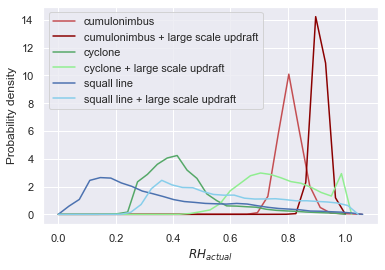

In [199]:
colorlist = np.asarray(['r', 'darkred', 'g', 'lightgreen', 'b', 'skyblue'])
labelslist = np.asarray(['cumulonimbus', 'cumulonimbus + large scale updraft', 'cyclone', 'cyclone + large scale updraft', 'squall line', 'squall line + large scale updraft'])
Rhnlist = np.reshape(Rhlist, 6)
for i in np.arange(len(RHnlist)):
    Rhhist = np.asarray(np.histogram(Rhnlist[i], density=True, bins=nbins))
    Rhdistrib = sp.rv_histogram(Rhhist)
    Rhxaxis = np.linspace(0,np.max(Rhnlist[i]),nbins)
    plt.plot(Rhxaxis, Rhdistrib.pdf(Rhxaxis), color=colorlist[i], label=labelslist[i])
plt.xlabel('$RH_{actual}$')
plt.ylabel('Probability density')
plt.legend()
plt.savefig('Figs/RHaProbsSuperposition.png', format='PNG', dpi=600)
plt.show()

# Step 3: Computing the predicted humidity

We now want to compute the predicted humidity at 5km, which is:
$$
RH = \frac{q_{sat}(z_{cloud})}{q_{sat}(z_{parcel})}
$$

To calculate $q_{sat}(z_{cloud})$ we changed $\texttt{LSA(T,X,Y,Z,QI,QC)}$ to $\texttt{LSA(T,X,Y,Z,QI,QC,QSAT)}$ where it now appends in $\texttt{qsatzclouds}$ the value of $q_{sat}$ at every $z_{clouds}$ found by the function.


In [190]:
qsatzclouds = lsa[2]
qsatzclouds2 = lsa2[2]
qsatzclouds3 = lsa3[2]
qsatzclouds4 = lsa4[2]
qsatzclouds5 = lsa5[2]
qsatzclouds6 = lsa6[2]

We attempt to use the relationship between $RH_{predicted}$ and $RH_{actual}$ to find $RH_{predicted}$. 
$$
RH_{predicted} = RH_{actual} \times \frac{q_{sat}(z_{clouds})}{q_v(z_{parcel})}
$$

$\left( \frac{q_{sat}(z_{clouds})}{q_{sat}(z_{parcel})} = \frac{q_{sat}(z_{clouds})}{q_{sat}(z_{parcel})} \times \frac{q_{v}(z_{parcel})}{q_{v}(z_{parcel})} = \frac{q_{v}(z_{parcel})}{q_{sat}(z_{parcel})} \times \frac{q_{sat}(z_{clouds})}{q_v(z_{parcel})} \right)$

We therefore also need $q_v(z_{parcel})$ in addition to $q_{sat}(z_{clouds})$ for each simulation. We obtain this value for each grid point by building the function shown subsequently. We add a criterion to correct for possible $q_v$ values being calculated with wrong units.

In [191]:
@njit
def QVZPARCEL(T,X,Y,Z,QV):
    qvzparcel = QV[:,Zparcel(Z)[0],:,:]
    for time in np.arange(len(T)):
        for i in np.arange(len(X)):
            for j in np.arange(len(Y)):
                if qvzparcel[time,i,j]<0.01:
                    qvzparcel[time,i,j] = qvzparcel[time,i,j]*1000
    return qvzparcel
qvzparcel = QVZPARCEL(t,x,y,z,qv)
qvzparcel2 = QVZPARCEL(t2,x2,y2,z2,qv2)
qvzparcel3 = QVZPARCEL(t3,x3,y3,z3,qv3)
qvzparcel4 = QVZPARCEL(t4,x4,y4,z4,qv4)
qvzparcel5 = QVZPARCEL(t5,x5,y5,z5,qv5)
qvzparcel6 = QVZPARCEL(t6,x6,y6,z6,qv6)

In [192]:
RHp = RH * (qsatzclouds/qvzparcel)
RHp2 = RH2 * (qsatzclouds2/qvzparcel2)
RHp3 = RH3 * (qsatzclouds3/qvzparcel3)
RHp4 = RH4 * (qsatzclouds4/qvzparcel4)
RHp5 = RH5 * (qsatzclouds5/qvzparcel5)
RHp6 = RH6 * (qsatzclouds6/qvzparcel6)

RHplist = np.asarray([RHp.flatten(), RHp2.flatten(), RHp3.flatten(), RHp4.flatten(), RHp5.flatten(), RHp6.flatten()])

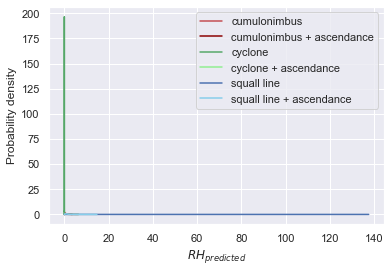

In [193]:
colorlist = np.asarray(['r', 'darkred', 'g', 'lightgreen', 'b', 'skyblue'])
labelslist = np.asarray(['cumulonimbus', 'cumulonimbus + ascendance', 'cyclone', 'cyclone + ascendance', 'squall line', 'squall line + ascendance'])
for i in np.arange(len(RHplist)):
    RHhist = np.asarray(np.histogram(RHplist[i], density=True, bins=nbins))
    RHdistrib = sp.rv_histogram(RHhist)
    RHxaxis = np.linspace(0,np.max(RHplist[i]),nbins)
    plt.plot(RHxaxis, RHdistrib.pdf(RHxaxis), color=colorlist[i], label=labelslist[i])
plt.xlabel('$RH_{predicted}$')
plt.ylabel('Probability density')
plt.legend()
plt.savefig('Figs/RHpProbsSuperposition.png', format='PNG', dpi=600)
plt.show()

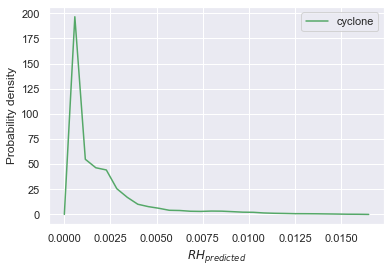

In [194]:
RHhist = np.asarray(np.histogram(RHplist[2], density=True, bins=nbins))
RHdistrib = sp.rv_histogram(RHhist)
RHxaxis = np.linspace(0,np.max(RHplist[2]),nbins)
plt.plot(RHxaxis, RHdistrib.pdf(RHxaxis), color=colorlist[2], label=labelslist[2])
plt.xlabel('$RH_{predicted}$')
plt.ylabel('Probability density')
plt.legend()
plt.show()

## This approach does not seem to work very well.  
We will try to calculate explicitely $RH_{predicted}$ in the following section. To do so, we first need to extract the index of $z_{clouds}$ values in $z$ array.

In [195]:
izclouds = lsa[1].astype(int)
izclouds2 = lsa2[1].astype(int)
izclouds3 = lsa3[1].astype(int)
izclouds4 = lsa4[1].astype(int)
izclouds5 = lsa5[1].astype(int)
izclouds6 = lsa6[1].astype(int)

We build a new function for $RH_{predicted}$ based on the one computing $RH_{actual}$. $q_v(z_{parcel})$ is effectively replaced by $q_{sat}(z_{clouds})$.

In [196]:
@njit
def RELHUMP(T,X,Y,Z,QSAT,iZclouds):
    RHp = np.zeros( (len(T),len(X),len(Y)) )
    for time in np.arange(len(T)):
        for i in np.arange(len(X)):
            for j in np.arange(len(Y)):
                if 100 < QSAT[time,iZclouds[time,i,j],j,i]/QSAT[time,Zparcel(Z)[0],j,i]:
                    RHp[time,i,j] = (QSAT[time,iZclouds[time,i,j],j,i]/QSAT[time,Zparcel(Z)[0],j,i])/1000
                else:
                    RHp[time,i,j] = (QSAT[time,iZclouds[time,i,j],j,i]/QSAT[time,Zparcel(Z)[0],j,i])
        return RHp

In [197]:
RHp = RELHUMP(t,x,y,z,qsat,izclouds) 
RHp2 = RELHUMP(t2,x2,y2,z2,qsat2,izclouds2)
RHp3 = RELHUMP(t3,x3,y3,z3,qsat3,izclouds3)
RHp4 = RELHUMP(t4,x4,y4,z4,qsat4,izclouds4)
RHp5 = RELHUMP(t5,x5,y5,z5,qsat5,izclouds5)
RHp6 = RELHUMP(t6,x6,y6,z6,qsat6,izclouds6)

RHplist = np.asarray([RHp.flatten(), RHp2.flatten(), RHp3.flatten(), RHp4.flatten(), RHp5.flatten(), RHp6.flatten()])

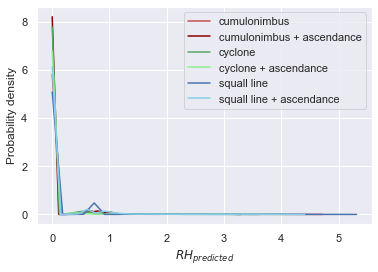

In [198]:
colorlist = np.asarray(['r', 'darkred', 'g', 'lightgreen', 'b', 'skyblue'])
labelslist = np.asarray(['cumulonimbus', 'cumulonimbus + ascendance', 'cyclone', 'cyclone + ascendance', 'squall line', 'squall line + ascendance'])
for i in np.arange(len(RHplist)):
    RHhist = np.asarray(np.histogram(RHplist[i], density=True, bins=nbins))
    RHdistrib = sp.rv_histogram(RHhist)
    RHxaxis = np.linspace(0,np.max(RHplist[i]),nbins)
    plt.plot(RHxaxis, RHdistrib.pdf(RHxaxis), color=colorlist[i], label=labelslist[i])
plt.xlabel('$RH_{predicted}$')
plt.ylabel('Probability density')
plt.legend()
plt.savefig('Figs/RHpProbsSuperposition.png', format='PNG', dpi=600)
plt.show()

## This yields a different result, but it seems the humidity cannot be predicted by $q_{sat}(z_{clouds})$ as it is presently done

## Translation of Fortran fuction QSAT(P,T)

In [24]:
P = data5.variables['p']
Tabs = data5.variables['TABS'][:]
print('P: ', data5.variables['p'], 'T: ', data5.variables['TABS'])

P:  <class 'netCDF4._netCDF4.Variable'>
float32 p(z)
    units: mb
    long_name: pressure
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
 T:  <class 'netCDF4._netCDF4.Variable'>
float32 TABS(time, z, y, x)
    long_name: Absolute Temperature                                                            
    units: K         
unlimited dimensions: time
current shape = (10, 64, 128, 128)
filling on, default _FillValue of 9.969209968386869e+36 used



In [25]:
def QSAT(P,T):

    p = P*100
    
    C0= 0.611583699e3
    C1= 0.444606896e2
    C2= 0.143177157e1
    C3= 0.264224321e-1
    C4= 0.299291081e-3
    C5= 0.203154182e-5
    C6= 0.702620698e-8
    C7= 0.379534310e-11
    C8= -0.321582393e-13

    iC0= 0.609868993e3
    iC1= 0.499320233e2
    iC2= 0.184672631e1
    iC3= 0.402737184e-1
    iC4= 0.565392987e-3
    iC5= 0.521693933e-5
    iC6= 0.307839583e-7
    iC7= 0.105785160e-9
    iC8= 0.161444444e-12

    XX = np.zeros(np.shape(T))
    XX[i,j] = np.max(-80, T[i,j]-273.16)

    #ESL = 612.2*np.exp(17.67*XX/(T-29.65))
    ESL = C0 + XX*(C1+XX*(C2+XX*(C3+XX*(C4+XX*(C5+XX*(C6+XX*(C7+XX*C8)))))))
    RSLF = np.zeros(np.shape(p))
    RSLF = 0.622*ESL/(p-ESL)

    ESI = iC0+XX*(iC1+XX*(iC2+XX*(iC3+XX*(iC4+XX*(iC5+XX*(iC6+XX*(iC7+XX*iC8)))))))
    RSIF = 0.622*ESI/(p-ESI)

    if T - 273.15 > 0:
        qsat = RSLF
    else:
        qsat = RSIF
    
    return qsat

In [26]:
T = data5.variables['TABS'][:]
print(np.shape(T))
for time in np.arange(len(t5)):
    for i in np.arange(len(x5)):
        for j in np.arange(len(y5)):
            Tmax = np.max(T[time,izparcel,j,i]-273.16)
            if T > -80
                XX[time,izparcel,j,i] = Tmax
            else:
                XX[time,izparcel,j,i] = -80

SyntaxError: invalid syntax (<ipython-input-26-22fa537c8ac3>, line 7)

In [157]:
XX[:,23,:,:] = T[:,23,:,:]-273.16
np.min(XX[:,23,:,:])

-11.751800537109375

4938.36